In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


Bad key "text.kerning_factor" on line 4 in
C:\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('./Activity06/iris-data.csv')
df = df[['Sepal Length', 'Sepal Width']]
df.head()

,Sepal Length,Sepal Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [3]:
cov = np.cov(df.values.T)

In [4]:
cov

array([[ 0.68569351, -0.03926846],
       [-0.03926846,  0.18800403]])

In [5]:
model = PCA(n_components=1)
sklearn_pca = model.fit_transform(df.values)

In [6]:
eigenvectors, eigenvalues, _ = np.linalg.svd(cov, full_matrices=False)
P = eigenvectors[0]
manual_pca = P.dot(df.values.T)

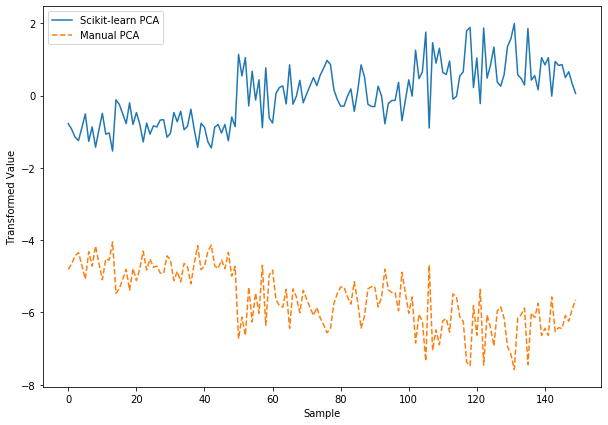

In [7]:
plt.figure(figsize=(10, 7));
plt.plot(sklearn_pca, label='Scikit-learn PCA');
plt.plot(manual_pca, label='Manual PCA', linestyle='--');
plt.xlabel('Sample');
plt.ylabel('Transformed Value');
plt.legend();

In [8]:
model.components_

array([[ 0.99693955, -0.07817635]])

In [9]:
P

array([-0.99693955,  0.07817635])

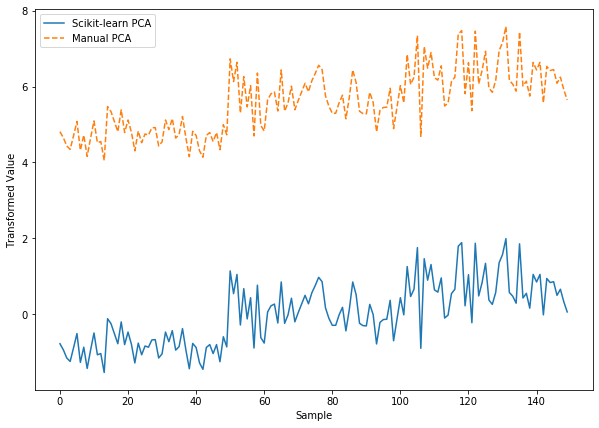

In [10]:
manual_pca *= -1
plt.figure(figsize=(10, 7));
plt.plot(sklearn_pca, label='Scikit-learn PCA');
plt.plot(manual_pca, label='Manual PCA', linestyle='--');
plt.xlabel('Sample');
plt.ylabel('Transformed Value');
plt.legend();

In [11]:
mean_vals = np.mean(df.values, axis=0)
offset_vals = df.values - mean_vals
manual_pca = P.dot(offset_vals.T)

In [12]:
manual_pca *= -1

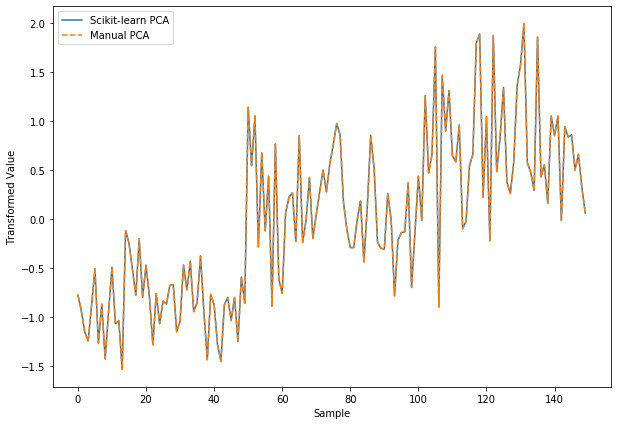

In [13]:
plt.figure(figsize=(10, 7));
plt.plot(sklearn_pca, label='Scikit-learn PCA');
plt.plot(manual_pca, label='Manual PCA', linestyle='--');
plt.xlabel('Sample');
plt.ylabel('Transformed Value');
plt.legend();

In [16]:
from mpl_toolkits.mplot3d import Axes3D # Required for 3D plotting

In [17]:
df = pd.read_csv('./Activity07/iris-data.csv')[['Sepal Length', 'Sepal Width', 'Petal Width']]
df.head()

,Sepal Length,Sepal Width,Petal Width
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2


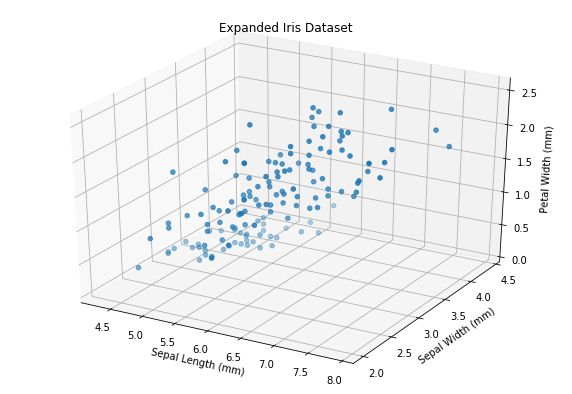

In [19]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['Sepal Length'],df['Sepal Width'],df['Petal Width']);
ax.set_xlabel('Sepal Length (mm)');
ax.set_ylabel('Sepal Width (mm)');
ax.set_zlabel('Petal Width (mm)');
ax.set_title('Expanded Iris Dataset');

In [20]:
model = PCA()

In [21]:
model.fit(df.values)

PCA()

In [22]:
model.explained_variance_ratio_

array([0.8004668 , 0.14652357, 0.05300962])

In [23]:
model = PCA(n_components=2)

In [25]:
data_transformed = model.fit_transform(df.values)

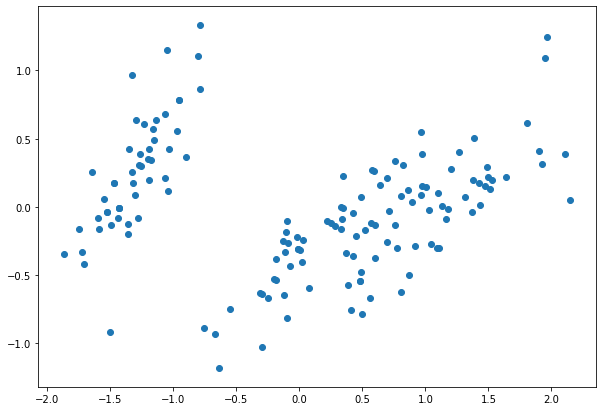

In [26]:
plt.figure(figsize = (10,7))
plt.scatter(data_transformed[:,0], data_transformed[:,1])